<a href="https://colab.research.google.com/github/thaismichelini/DataScience/blob/main/An%C3%A1lise_de_dados_de_Vacina%C3%A7%C3%A3o_Amazonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados de Vacinação da Open DataSUS Amazonas

https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8






In [ ]:
!mkdir -p "/content/drive/MyDrive/vacina-covid"

In [ ]:
!wget -P "/content/drive/MyDrive/vacina-covid" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-15/uf%3DAM/part-00000-8748771e-9805-498e-bccc-ba05623a93c6.c000.csv

--2021-05-15 22:29:04--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-15/uf%3DAM/part-00000-8748771e-9805-498e-bccc-ba05623a93c6.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.163.30
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.163.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464859257 (443M) [text/csv]
Saving to: ‘/content/drive/MyDrive/vacina-covid/part-00000-8748771e-9805-498e-bccc-ba05623a93c6.c000.csv’

part-00000-8748771e 100%[===================>] 443.32M  23.0MB/s    in 21s     

2021-05-15 22:29:26 (20.9 MB/s) - ‘/content/drive/MyDrive/vacina-covid/part-00000-8748771e-9805-498e-bccc-ba05623a93c6.c000.csv’ saved [464859257/464859257]



In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
vacina_AM = pd.read_csv('/content/drive/MyDrive/vacina-covid/part-00000-8748771e-9805-498e-bccc-ba05623a93c6.c000.csv', sep=";")

In [ ]:
vacina_AM.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,166db693-848b-4b51-af67-de76a2cc5e0f-i0b0,93eb9736fe3e9b9218c13bd32f0c3ff23fab8a448dcefd...,26,1994-06-01,F,5,INDIGENA,130406.0,10.0,TABATINGA,BRASIL,AM,69640.0,B,5591171,DISTRITO SANITARIO ESPECIAL DE SAUDE INDIGENA ...,POLO BASE FEIJOAL,130060,BENJAMIN CONSTANT,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-08T20:34:27.000Z,NaN
1,cb05dbac-0588-4256-b8f2-f22d19ac2aa5-i0b0,2be3f2489ef95a585fd79240ed240405e422a7467e7f8a...,39,1982-03-11,M,3,PARDA,130255.0,10.0,MANAQUIRI,BRASIL,AM,69435.0,B,5501369,PREFEITURA MUNICIPAL DE MANAQUIRI,UNIDADE BASIC A DE SAUDE AGASSIS VIEIRA SOUTO,130255,MANAQUIRI,AM,602,Ribeirinha,6.0,Povos e Comunidades Tradicionais,212VCD001ZVB,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-06,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-12T18:21:36.000Z,NaN
2,167377c6-f311-4382-824a-e397c0bb2dbd-i0b0,e4b1732f6bdc3c99ea5760993159bda9a444de1b938f6a...,20,2000-06-15,M,5,INDIGENA,130370.0,10.0,SANTO ANTONIO DO ICA,BRASIL,AM,69680.0,B,7295820,DISTRITO SANITARIO ESPECIAL INDIGENA ALTO RIO ...,POLO BASE DE BETANIA,130370,SANTO ANTONIO DO ICA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-23,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-10T14:22:52.000Z,NaN
3,d2125520-184d-4434-884c-83d31cb432ad-i0b0,2d83e949365ad6e7f97aacd5c31e38248907b2cde12ebb...,55,1965-12-05,M,3,PARDA,130255.0,10.0,MANAQUIRI,BRASIL,AM,69435.0,B,5501369,PREFEITURA MUNICIPAL DE MANAQUIRI,UNIDADE BASIC A DE SAUDE AGASSIS VIEIRA SOUTO,130255,MANAQUIRI,AM,602,Ribeirinha,6.0,Povos e Comunidades Tradicionais,212VCD001ZVB,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-06,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-12T18:09:37.000Z,NaN
4,2f207e36-0af3-4788-ad7e-719b15d7749e-i0b0,cf92633ac4a3faadb043ab830a8bdff7210d9e54e809ab...,71,1949-12-29,M,3,PARDA,130260.0,10.0,MANAUS,BRASIL,AM,69047.0,B,2015323,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF MANSOUR BULBOL,130260,MANAUS,AM,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,4120Z025,University of Oxford/AstraZeneca,NaN,2021-03-12,1ª Dose,85,Vacina Covid-19 - Covishield,SMV,2021-03-14T12:16:37.000Z,NaN


Conhecendo os dados



In [ ]:
vacina_AM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895270 entries, 0 to 895269
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   document_id                               895270 non-null  object 
 1   paciente_id                               895270 non-null  object 
 2   paciente_idade                            895270 non-null  int64  
 3   paciente_datanascimento                   895270 non-null  object 
 4   paciente_enumsexobiologico                895270 non-null  object 
 5   paciente_racacor_codigo                   895270 non-null  int64  
 6   paciente_racacor_valor                    895270 non-null  object 
 7   paciente_endereco_coibgemunicipio         886306 non-null  float64
 8   paciente_endereco_copais                  886355 non-null  float64
 9   paciente_endereco_nmmunicipio             886331 non-null  object 
 10  paciente_endereco_nm

Informação por Raça


In [ ]:
vacina_AM.paciente_racacor_valor.value_counts()

PARDA             398271
SEM INFORMACAO    185809
AMARELA           156801
INDIGENA           72812
BRANCA             71962
PRETA               9615
Name: paciente_racacor_valor, dtype: int64

In [ ]:
vacina_AM.paciente_racacor_valor.value_counts(normalize=True)

PARDA             0.444861
SEM INFORMACAO    0.207545
AMARELA           0.175144
INDIGENA          0.081330
BRANCA            0.080380
PRETA             0.010740
Name: paciente_racacor_valor, dtype: float64

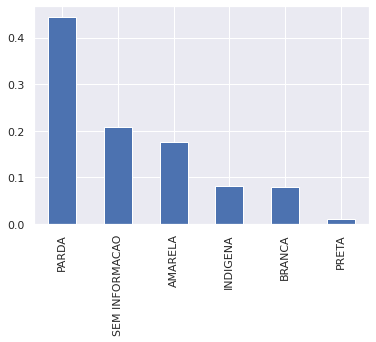

In [ ]:
vacina_AM.paciente_racacor_valor.value_counts(normalize=True).plot(kind='bar')

Dados por Idade

Fabricantes

In [ ]:
vacina_AM.vacina_fabricante_nome.value_counts(normalize=True)

Butantan/Sinovac                    0.391199
FUNDACAO BUTANTAN                   0.225916
University of Oxford/AstraZeneca    0.212654
FUNDACAO OSWALDO CRUZ               0.132067
SERUM INSTITUTE OF INDIA LTD        0.017848
SINOVAC LIFE SCIENCE CO LTD         0.013685
MINISTERIO DA SAUDE                 0.006152
BioNTech/Fosun Pharma/Pfizer        0.000475
Janssen-Cilag                       0.000002
Name: vacina_fabricante_nome, dtype: float64

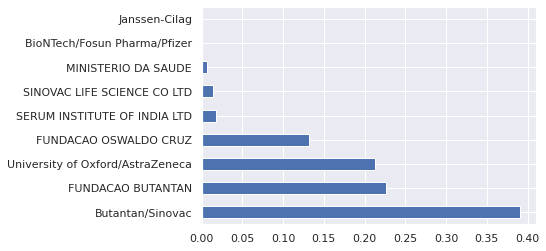

In [ ]:
vacina_AM.vacina_fabricante_nome.value_counts(normalize=True).plot(kind='barh')

Descrição do Banco

In [ ]:
vacina_AM.describe(include='all')

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
count,895270,895270,895270.000000,895270,895270,895270.000000,895270,886306.000000,886355.000000,886331,886355,886306,734587.000000,894752,8.952700e+05,895270,895270,895270.000000,895270,895270,895270.000000,875942,875942.000000,875881,895270,895270,326000,895270,895270,895270.000000,895270,895270,895270,0.0
unique,894951,588605,NaN,29529,2,NaN,6,NaN,NaN,1861,7,28,NaN,3,NaN,136,440,NaN,62,1,NaN,77,NaN,15,111,9,3,121,3,NaN,5,3,289597,NaN
top,2346d153-41fa-4f00-b762-d30973d9c3f9-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,NaN,1960-07-20,F,NaN,PARDA,NaN,NaN,MANAUS,BRASIL,AM,NaN,B,NaN,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF DR LUIZ MONTENEGRO,NaN,MANAUS,AM,NaN,Pessoas de 60 a 64 anos,NaN,Faixa Etária,202010025,Butantan/Sinovac,Organization/61189445000156,2021-02-09,1ª Dose,NaN,Covid-19-Coronavac-Sinovac/Butantan,SMV,2021-04-19T20:33:39.000Z,NaN
freq,2,5,NaN,163,483244,NaN,398271,NaN,NaN,528889,886330,851425,NaN,887832,NaN,506856,170049,NaN,547153,895270,NaN,142712,NaN,396599,133872,350229,202256,19666,586407,NaN,568464,541022,18065,NaN
mean,NaN,NaN,54.645515,NaN,NaN,23.090643,NaN,134139.058607,10.004697,NaN,NaN,NaN,68905.243781,NaN,3.044522e+06,NaN,NaN,130247.761774,NaN,NaN,414.657258,NaN,4.167530,NaN,NaN,NaN,NaN,NaN,NaN,85.660529,NaN,NaN,NaN,NaN
std,NaN,NaN,17.572415,NaN,NaN,38.857909,NaN,31300.185094,0.949693,NaN,NaN,NaN,5277.893445,NaN,1.989550e+06,NaN,NaN,83.486460,NaN,NaN,316.668765,NaN,3.100697,NaN,NaN,NaN,NaN,NaN,NaN,0.546829,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,110001.000000,10.000000,NaN,NaN,NaN,0.000000,NaN,7.089000e+04,NaN,NaN,130002.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,41.000000,NaN,NaN,3.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69050.000000,NaN,2.013916e+06,NaN,NaN,130260.000000,NaN,NaN,201.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,58.000000,NaN,NaN,3.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69090.000000,NaN,2.016702e+06,NaN,NaN,130260.000000,NaN,NaN,204.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,67.000000,NaN,NaN,5.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69400.000000,NaN,3.019071e+06,NaN,NaN,130260.000000,NaN,NaN,701.000000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.000000,NaN,NaN,NaN,NaN


In [ ]:
vacina_AM.groupby(['paciente_idade' , 'vacina_grupoatendimento_nome']).count()

document_id  ...  id_sistema_origem
paciente_idade vacina_grupoatendimento_nome                      ...                   
0              Enfermeiro(a)                                  1  ...                  0
               Povos indígenas em terras indígenas            2  ...                  0
1              Povos indígenas em terras indígenas            1  ...                  0
2              Pessoas de 70 a 74 anos                        1  ...                  0
               Povos indígenas em terras indígenas            2  ...                  0
...                                                         ...  ...                ...
121            Povos indígenas em terras indígenas            2  ...                  0
               Técnico de Enfermagem                          3  ...                  0
124            Pessoas de 60 a 64 anos                        1  ...                  0
126            Pessoas de 80 anos ou mais                     1  ...                  0
127            Pessoas de 80 anos ou mais                     1  ...                  0

[3456 rows x 32 columns]

In [ ]:
vacina_AM.groupby(['paciente_idade' , 'vacina_grupoatendimento_nome']).count().head(40)

document_id  ...  id_sistema_origem
paciente_idade vacina_grupoatendimento_nome                                     ...                   
0              Enfermeiro(a)                                                 1  ...                  0
               Povos indígenas em terras indígenas                           2  ...                  0
1              Povos indígenas em terras indígenas                           1  ...                  0
2              Pessoas de 70 a 74 anos                                       1  ...                  0
               Povos indígenas em terras indígenas                           2  ...                  0
3              Pessoal da Limpeza                                            2  ...                  0
               Povos indígenas em terras indígenas                           2  ...                  0
4              Pessoas de 70 a 74 anos                                       1  ...                  0
               Povos indígenas em terras indígenas                           3  ...                  0
5              Povos indígenas em terras indígenas                           1  ...                  0
6              Enfermeiro(a)                                                 1  ...                  0
               Povos indígenas em terras indígenas                           1  ...                  0
7              Hipertensão de difícil controle ou com complica...            1  ...                  0
               Povos indígenas em terras indígenas                           1  ...                  0
8              Diabetes Mellitus                                             1  ...                  0
               Pessoas de 65 a 69 anos                                       1  ...                  0
               Povos indígenas em terras indígenas                           5  ...                  0
9              Povos indígenas em terras indígenas                           4  ...                  0
11             Pessoas de 60 a 64 anos                                       2  ...                  0
               Pessoas de 75 a 79 anos                                       1  ...                  0
12             Pessoas de 60 a 64 anos                                       1  ...                  0
               Pessoas de 65 a 69 anos                                       1  ...                  0
               Pessoas de 80 anos ou mais                                    1  ...                  0
               Povos indígenas em terras indígenas                           4  ...                  0
               Síndrome de Down                                              2  ...                  0
13             Pessoas de 65 a 69 anos                                       1  ...                  0
               Pessoas de 75 a 79 anos                                       1  ...                  0
               Povos indígenas em terras indígenas                           5  ...                  0
14             Pessoas com Deficiência Institucionalizadas                   1  ...                  0
               Pessoas de 80 anos ou mais                                    1  ...                  0
               Povos indígenas em terras indígenas                           7  ...                  0
15             Guarda Municipal                                              1  ...                  0
               Outros                                                        1  ...                  0
               Pessoas de 60 a 64 anos                                       1  ...                  0
               Pessoas de 65 a 69 anos                                       1  ...                  0
               Pessoas de 70 a 74 anos                                       2  ...                  0
               Povos indígenas em terras indígenas                          11  ...                  0
               Segurança                          

In [ ]:
vacina_AM[vacina_AM.paciente_idade == 0]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
159826,2b7b810a-a9db-44e6-9b11-532689706e87-i0b0,a0948b4724276636cf0a1ae2de1c91cbaac8f04f8d79fc...,0,2021-01-27,M,1,BRANCA,354980.0,10.0,SAO JOSE DO RIO PRETO,BRASIL,SP,15052.0,B,7671660,DISTRITO SANITARIO ESPECIAL INDIGINA MEDIO SOL...,POLO BASE BUA BUA,130210,JAPURA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-27,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-11T15:28:23.000Z,NaN
168556,2e3b954e-0941-425f-8d04-0d543639736c-i0b0,d210979e44ed295f04d7b5f5f5f7f0f33d62fadeb5a8eb...,0,2020-07-26,M,5,INDIGENA,130060.0,10.0,BENJAMIN CONSTANT,BRASIL,AM,69630.0,B,5480000,DISTRITO SANITARIO ESPECIAL DE SAUDE INDIGENA ...,POLO BASE FILADELFIA,130060,BENJAMIN CONSTANT,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-28,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-11T21:33:06.000Z,NaN
228130,b6210a5e-c6e8-49e2-903f-71dcaaecfa90-i0b0,3e4ca17fec06685e3259153c1556759991f8cdd0dc33b9...,0,2021-03-08,F,3,PARDA,130420.0,10.0,TEFE,BRASIL,AM,NaN,B,6817564,PREFEITURA MUNICIPAL DE TEFE,UNIDADE BASICA DE SAUDE LOURIVAL PIRES,130420,TEFE,AM,0,NaN,NaN,NaN,200278,SERUM INSTITUTE OF INDIA LTD,NaN,2021-03-08,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-18T12:45:03.000Z,NaN
360740,93199867-3df0-417e-9e19-3f6d60ec7245-i0b0,3e4ca17fec06685e3259153c1556759991f8cdd0dc33b9...,0,2021-03-08,F,3,PARDA,130420.0,10.0,TEFE,BRASIL,AM,NaN,B,6817564,PREFEITURA MUNICIPAL DE TEFE,UNIDADE BASICA DE SAUDE LOURIVAL PIRES,130420,TEFE,AM,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,202010028,SERUM INSTITUTE OF INDIA LTD,NaN,2021-04-06,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-04-08T10:00:02.000Z,NaN


Análise de Dados por Idade

In [ ]:
vacina_AM.paciente_idade.value_counts(normalize=True)

60     0.040382
61     0.038845
62     0.037374
63     0.031041
64     0.024323
         ...   
114    0.000001
116    0.000001
124    0.000001
1      0.000001
127    0.000001
Name: paciente_idade, Length: 120, dtype: float64

Análise por Data de Aplicação


In [ ]:
pd.to_datetime(vacina_AM.vacina_dataaplicacao)

0        2021-01-21
1        2021-05-06
2        2021-01-23
3        2021-05-06
4        2021-03-12
            ...    
895265   2021-04-16
895266   2021-03-04
895267   2021-03-17
895268   2021-01-31
895269   2021-02-10
Name: vacina_dataaplicacao, Length: 895270, dtype: datetime64[ns]

Criando uma nova coluna data para explorar dados por dia, mês...


In [ ]:
vacina_AM.vacina_dataaplicacao.dt.month

0         1
1         5
2         1
3         5
4         3
         ..
895265    4
895266    3
895267    3
895268    1
895269    2
Name: vacina_dataaplicacao, Length: 895270, dtype: int64

In [ ]:
vacina_AM['vacina_dataaplicacao_date'] = vacina_AM.vacina_dataaplicacao

In [ ]:
vacina_AM['vacina_dataaplicacao_weekofyear'] = vacina_AM.vacina_dataaplicacao.dt.isocalendar().week

Análise por semana do Ano 

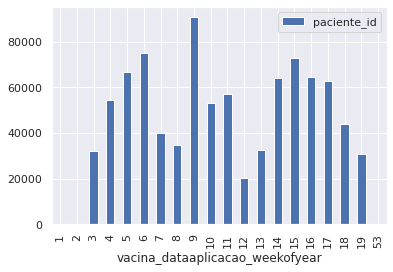

In [ ]:
vacina_AM.groupby(['vacina_dataaplicacao_weekofyear']).agg({'paciente_id':'count'}).plot(kind='bar')

Vacinação por Município

In [ ]:
vacina_AM.estabelecimento_municipio_nome.value_counts()

MANAUS                      547153
SAO GABRIEL DA CACHOEIRA     23098
IRANDUBA                     18704
PARINTINS                    17847
ITACOATIARA                  17375
                             ...  
APUI                           893
JAPURA                         892
JURUA                          866
JUTAI                          571
TAPAUA                         417
Name: estabelecimento_municipio_nome, Length: 62, dtype: int64

 Os 10 município com maior número de vacinação, excluindo Manaus


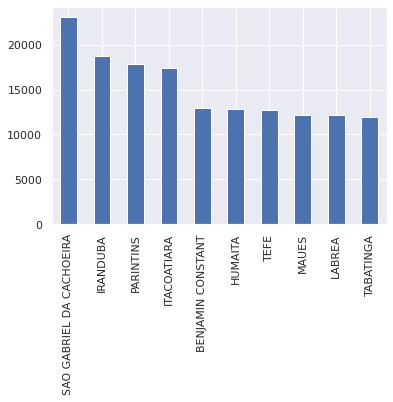

In [ ]:
vacina_AM.estabelecimento_municipio_nome.value_counts()[1:].head(10).plot(kind='bar')

Análise Grupo de Atendimento


In [ ]:
vacina_AM.vacina_grupoatendimento_nome.value_counts(normalize=True)

Pessoas de 60 a 64 anos                                          0.162924
Povos indígenas em terras indígenas                              0.114321
Pessoas de 65 a 69 anos                                          0.088669
Outros                                                           0.084782
Pessoas de 70 a 74 anos                                          0.084256
                                                                   ...   
Gestante                                                         0.000017
Acadêmicos/estudantes em estágio em estabelecimentos de saúde    0.000015
Trabalhadores Industriais                                        0.000005
Caminhoneiro                                                     0.000002
Cirrose hepática                                                 0.000002
Name: vacina_grupoatendimento_nome, Length: 77, dtype: float64

Análise por Sexo

In [ ]:
vacina_AM.paciente_enumsexobiologico.value_counts()

F    483244
M    412026
Name: paciente_enumsexobiologico, dtype: int64

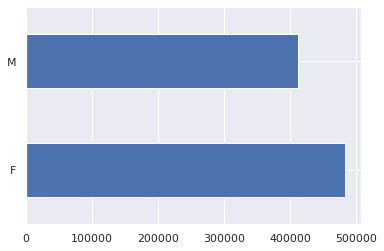

In [ ]:
vacina_AM.paciente_enumsexobiologico.value_counts().plot(kind='barh')

Análise por Dose

In [ ]:
vacina_AM.groupby(['paciente_id','vacina_descricao_dose']).agg({'document_id':'count'}).sort_values(by = 'document_id', ascending=False)

document_id
paciente_id                                        vacina_descricao_dose             
da72b5883d98f5413e002395ef043355660dfed9baa626c...     1ª Dose                      4
891f04c7542179ce654d024cd9fcd668bae8311628a693a...     1ª Dose                      3
f4120614e3aee00497f290f21c2798641397ad421f5d503...     1ª Dose                      3
d22450ebd86632b32999c2a5cb1d22b8a1f85661d95cba8...     1ª Dose                      3
21d390a9fa1830e4edabc1212770fda44d64580325f4789...     1ª Dose                      3
...                                                                               ...
55920246f6ecb073cb3245d24a2123a135c7b36c557caa5...     1ª Dose                      1
                                                       2ª Dose                      1
559212231bdb15732ddf64f0cfe08e6a2e3a7d25a9f6474...     1ª Dose                      1
                                                       2ª Dose                      1
fffffdc05eae3c2d6afb6d58cf8267066cdda69c82e3a5b...     2ª Dose                      1

[890788 rows x 1 columns]

In [ ]:
vacina_AM.drop_duplicates(inplace=True)

Encontramos 1 indivíduo que "recebeu" 4 doses

In [ ]:
vacina_AM.groupby(['paciente_id','vacina_descricao_dose']).agg({'document_id':'count'}).sort_values(by = 'document_id', ascending=False)

,,document_id
paciente_id,vacina_descricao_dose,
da72b5883d98f5413e002395ef043355660dfed9baa626c9ae1f4ae24559e8c0,1ª Dose,4
cf026c81ed3fc153d5bebc760a2b052f210821af5a9e912acb65b76298b3233a,1ª Dose,3
ebe6d3fcf76a77b6bf65aad77c623335b64e897fbfdefdba7c0bff12a345d11b,1ª Dose,3
d166d27d61e11f7845cb53f81a567a21868679dbc368abd849af94969f898ef5,1ª Dose,3
54817396de45e97fa7f4fb54a8c94be01b7f490b14b1d8bf8253ce3df8556301,1ª Dose,3
...,...,...
558c5454c759051e5861fc93c551d32caab5b3183ca4ac0067ee7878ef2b26a6,2ª Dose,1
558cdcab14ecb4ef57fd64e236549092bdbc678fd09a14ab141084fd0c808206,1ª Dose,1
558ce70f2ec3297f5a5b6fb14ec36771fcacdfc32abe97dfef4486eab508d539,1ª Dose,1


Mesma idade, mesmo local de vacinação... mas informações incoerrentes, provavemente erro no preenchimento.


In [ ]:
vacina_AM[vacina_AM.paciente_id == 'da72b5883d98f5413e002395ef043355660dfed9baa626c9ae1f4ae24559e8c0']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_dataaplicacao_date,vacina_dataaplicacao_weekofyear,vacina_dataAplicacao_date
147085,b6716b43-0622-43f1-893d-612be68e8a91-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37,1983-11-19,F,1,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,NaN,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-01,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-01T12:12:39.000Z,NaN,2021-02-01,5,2021-02-01
160589,95a613c9-ec23-4e3e-b1f6-531d854200a8-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37,1983-11-19,F,1,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,69440.0,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,210012,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-01,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-02T15:03:34.000Z,NaN,2021-03-01,9,2021-03-01
324474,9e966d15-d6af-4a54-8dd8-7fdc1a59a128-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37,1983-11-19,F,1,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,69440.0,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-02,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-02T14:57:30.000Z,NaN,2021-02-02,5,2021-02-02
325940,85714291-64e8-4ac4-bc4c-14c0a8bb7b0d-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37,1983-11-19,F,1,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,69440.0,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,0,NaN,NaN,NaN,20010028,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-21,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-20T01:31:51.000Z,NaN,2021-01-21,3,2021-01-21
352815,e32e694b-a164-4d7c-b165-e5f6d0f6f8be-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37,1983-11-19,F,1,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,69440.0,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-02,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-02T14:41:36.000Z,NaN,2021-02-02,5,2021-02-02
